# 2.4 Treino de um modelo (aprendizagem automática)

#### Data Loading

In [38]:
import nltk
import csv
import pandas as pd
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from collections import Counter
import itertools 
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vasco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
train_df = pd.read_csv("imdb_reviews_train.csv", encoding="utf-8")
test_df = pd.read_csv("imdb_reviews_test.csv", encoding="utf-8")
print(train_df.head(10))
print(test_df.head(10))

                                                text label
0  This is your typical cheerful and colorful MGM...   pos
1  As a another reviewer states Hanna's War is an...   pos
2  One of the best "Amitabh comeback" movies I li...   pos
3  Peter Sollett has created an endearing portrai...   pos
4  The film is not visually stunning in the conve...   pos
5  This is not Bela Lagosi's best movie, but it's...   pos
6  I happened to watch this movie by chance some ...   pos
7  So many consider The Black Cat as the best Kar...   pos
8  I saw this at a screening last night too. I wa...   pos
9  One of the best true crime movies ever made an...   pos
                                                text label
0  Logan Lerman & Dean Collins III of Jack & Bobb...   pos
1  I have seen this film on a Sunday evening and ...   pos
2  Two great stars and a legendary Director creat...   pos
3  I'm originally from Brazil... the sad thing ab...   pos
4  "Witchery" is a decent little Euro Trash horro...   p

In [40]:
import ast
train_clean = pd.read_csv("train_clean.csv", encoding="utf-8")
test_clean = pd.read_csv("test_clean.csv", encoding="utf-8")
train_clean_sn = pd.read_csv("train_clean_sn.csv", encoding="utf-8")
test_clean_sn = pd.read_csv("test_clean_sn.csv", encoding="utf-8")
# Converter a coluna 'text' de string para lista
for df in [train_clean, test_clean, train_clean_sn, test_clean_sn]:
    df["text"] = df["text"].apply(ast.literal_eval)
print(train_clean.head(10))
print(test_clean.head(10))
print(train_clean_sn.head(10))
print(test_clean_sn.head(10))

                                                text label
0  [typical, cheerful, colorful, mgm, musical, ea...   pos
1  [another, reviewer, states, hanna, war, outsta...   pos
2  [one, best, amitabh, comeback, movies, liked, ...   pos
3  [peter, sollett, created, endearing, portrait,...   pos
4  [film, NOT_visually, NOT_stunning, NOT_convent...   pos
5  [NOT_bela, NOT_lagosi, NOT_best, NOT_movie, NO...   pos
6  [happened, watch, movie, chance, days, ago, fl...   pos
7  [many, consider, black, cat, best, karloff, lu...   pos
8  [saw, screening, last, night, totally, blown, ...   pos
9  [one, best, true, crime, movies, ever, made, f...   pos
                                                text label
0  [logan, lerman, dean, collins, iii, jack, bobb...   pos
1  [seen, film, sunday, evening, must, say, NOT_b...   pos
2  [two, great, stars, legendary, director, creat...   pos
3  [originally, brazil, sad, thing, movie, exploi...   pos
4  [witchery, decent, little, euro, trash, horror...   p

#### Vetorização (COM negação)

In [42]:
train_clean = pd.DataFrame(train_clean)
train_clean['label'] = train_df['label']
test_clean = pd.DataFrame(test_clean)
test_clean['label'] = test_df['label']
print(train_clean.head(5))
print(test_clean.head(5))

                                                text label
0  [typical, cheerful, colorful, mgm, musical, ea...   pos
1  [another, reviewer, states, hanna, war, outsta...   pos
2  [one, best, amitabh, comeback, movies, liked, ...   pos
3  [peter, sollett, created, endearing, portrait,...   pos
4  [film, NOT_visually, NOT_stunning, NOT_convent...   pos
                                                text label
0  [logan, lerman, dean, collins, iii, jack, bobb...   pos
1  [seen, film, sunday, evening, must, say, NOT_b...   pos
2  [two, great, stars, legendary, director, creat...   pos
3  [originally, brazil, sad, thing, movie, exploi...   pos
4  [witchery, decent, little, euro, trash, horror...   pos


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Converter as listas de palavras em strings
X_train = train_clean["text"].apply(lambda x: " ".join(x))
y_train = train_clean["label"]
# mesmo para o conjunto de teste
X_test = test_clean["text"].apply(lambda x: " ".join(x))
y_test = test_clean["label"]

# Transformar textos em vetores TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train) # fit = aprende os tokens relevantes, transform = transforma os textos em vetores
X_test_vec = vectorizer.transform(X_test) # já aprendeu os tokens relevantes, só transforma os textos em vetores

#### Vetorização (SEM negação)

In [44]:
train_clean_sn = pd.DataFrame(train_clean_sn)
train_clean_sn['label'] = train_df['label']
test_clean_sn = pd.DataFrame(test_clean_sn)
test_clean_sn['label'] = test_df['label']
print(train_clean_sn.head(5))
print(test_clean_sn.head(5))

                                                text label
0  [typical, cheerful, colorful, mgm, musical, ea...   pos
1  [another, reviewer, states, hanna, war, outsta...   pos
2  [one, best, amitabh, comeback, movies, liked, ...   pos
3  [peter, sollett, created, endearing, portrait,...   pos
4  [film, visually, stunning, conventional, sense...   pos
                                                text label
0  [logan, lerman, dean, collins, iii, jack, bobb...   pos
1  [seen, film, sunday, evening, must, say, bette...   pos
2  [two, great, stars, legendary, director, creat...   pos
3  [originally, brazil, sad, thing, movie, exploi...   pos
4  [witchery, decent, little, euro, trash, horror...   pos


In [45]:
# Converter as listas de palavras em strings
X_train_sn = train_clean_sn["text"].apply(lambda x: " ".join(x))
y_train_sn = train_clean_sn["label"]
# mesmo para o conjunto de teste
X_test_sn = test_clean_sn["text"].apply(lambda x: " ".join(x))
y_test_sn = test_clean_sn["label"]

# Transformar textos em vetores TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec_sn = vectorizer.fit_transform(X_train_sn) # fit = aprende os tokens relevantes, transform = transforma os textos em vetores
X_test_vec_sn = vectorizer.transform(X_test_sn) # já aprendeu os tokens relevantes, só transforma os textos em vetores

In [47]:
# # Exemplo de representação TF-IDF para uma review (a 11ª review do conjunto de treino)
# dense_vector = X_train_vec[10].toarray()
# feature_names = vectorizer.get_feature_names_out()

# # Dar print dos tokens (não nulos) correspondentes ao seu TF-IDF
# row = X_train_vec[10]
# row_dict = {feature_names[col]: row[0, col] for col in row.indices}
# print(row_dict)
# print(f'Tokens relevantes na linha 11: {len(row_dict)}')


#### Classificação (COM negação)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [49]:
# Regressão Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)

# Naïve Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_vec, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vec, y_train)

# Support Vector Machine
svm = LinearSVC(max_iter=10000, random_state=42)
svm.fit(X_train_vec, y_train)


# Fazer previsões
# Regressão Logística
y_pred_lr = lr.predict(X_test_vec)
# Naïve Bayes
y_pred_nb = nb.predict(X_test_vec)
# Decision Tree
y_pred_dt = dt.predict(X_test_vec)
# Random Forest
y_pred_rf = rf.predict(X_test_vec)
# Support Vector Machine
y_pred_svm = svm.predict(X_test_vec)

c:\Users\vasco\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


#### Classificação (SEM negação)

In [50]:
# Regressão Logística
lr_sn = LogisticRegression(max_iter=1000)
lr_sn.fit(X_train_vec_sn, y_train_sn)

# Naïve Bayes
nb_sn = MultinomialNB()
nb_sn.fit(X_train_vec_sn, y_train_sn)

# Decision Tree
dt_sn = DecisionTreeClassifier(random_state=42)
dt_sn.fit(X_train_vec_sn, y_train_sn)

# Random Forest
rf_sn = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sn.fit(X_train_vec_sn, y_train_sn)

# Suporte Vector Machine
svm_sn = LinearSVC(max_iter=10000, random_state=42)
svm_sn.fit(X_train_vec_sn, y_train_sn)


# Fazer previsões
# Regressão Logística
y_pred_lr_sn = lr_sn.predict(X_test_vec_sn)
# Naïve Bayes
y_pred_nb_sn = nb_sn.predict(X_test_vec_sn)
# Decision Tree
y_pred_dt_sn = dt_sn.predict(X_test_vec_sn)
# Random Forest
y_pred_rf_sn = rf_sn.predict(X_test_vec_sn)
# Support Vector Machine
y_pred_svm_sn = svm_sn.predict(X_test_vec_sn)

c:\Users\vasco\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


#### Métricas de Classificação (COM negação)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Criar uma lista de previsões e modelos
classificador = {
    "Regressão Logística ": y_pred_lr,
    "Naive Bayes": y_pred_nb,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Support Vector Machine": y_pred_svm
}

# Lista para armazenar as métricas
metrics = []

# Loop sobre os modelos e calcular as métricas
for model_name, y_pred in classificador.items():
    metrics.append({
        "Classificador": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label="pos"),
        "Recall": recall_score(y_test, y_pred, pos_label="pos"),
        "F1-score": f1_score(y_test, y_pred, pos_label="pos")
    })

# Criar DataFrame para exibir as métricas
df_metrics = pd.DataFrame(metrics)

# Função para dar highlight ao valor máximo de cada métrica
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

# Aplicar o styling no DataFrame
styled_df = df_metrics.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

styled_df

,Classificador,Accuracy,Precision,Recall,F1-score
0,Regressão Logística,0.886525,0.887686,0.883793,0.885735
1,Naive Bayes,0.841880,0.884394,0.784853,0.831655
2,Decision Tree,0.721313,0.728333,0.701718,0.714778
3,Random Forest,0.851609,0.868406,0.827151,0.847277
4,Support Vector Machine,0.877523,0.883743,0.868080,0.875841


#### Métricas de Classificação (SEM negação)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Criar uma lista de previsões e modelos
classificador_sn = {
    "Regressão Logística ": y_pred_lr_sn,
    "Naive Bayes": y_pred_nb_sn,
    "Decision Tree": y_pred_dt_sn,
    "Random Forest": y_pred_rf_sn,
    "Support Vector Machine": y_pred_svm_sn
}

# Lista para armazenar as métricas
metrics_sn = []

# Loop sobre os modelos e calcular as métricas
for model_name_sn, y_pred_sn in classificador_sn.items():
    metrics_sn.append({
        "Classificador": model_name_sn,
        "Accuracy": accuracy_score(y_test_sn, y_pred_sn),
        "Precision": precision_score(y_test_sn, y_pred_sn, pos_label="pos"),
        "Recall": recall_score(y_test_sn, y_pred_sn, pos_label="pos"),
        "F1-score": f1_score(y_test_sn, y_pred_sn, pos_label="pos")
    })

# Criar DataFrame para exibir as métricas
df_metrics_sn = pd.DataFrame(metrics_sn)

# Aplicar o styling no DataFrame
styled_df_sn = df_metrics_sn.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

styled_df_sn

,Classificador,Accuracy,Precision,Recall,F1-score
0,Regressão Logística,0.882797,0.883010,0.881235,0.882122
1,Naive Bayes,0.838152,0.882377,0.778549,0.827218
2,Decision Tree,0.717358,0.716549,0.714782,0.715664
3,Random Forest,0.852928,0.861374,0.839576,0.850335
4,Support Vector Machine,0.873022,0.879881,0.862598,0.871154


#### Matrizes de Confusão por Classificador (COM negação)

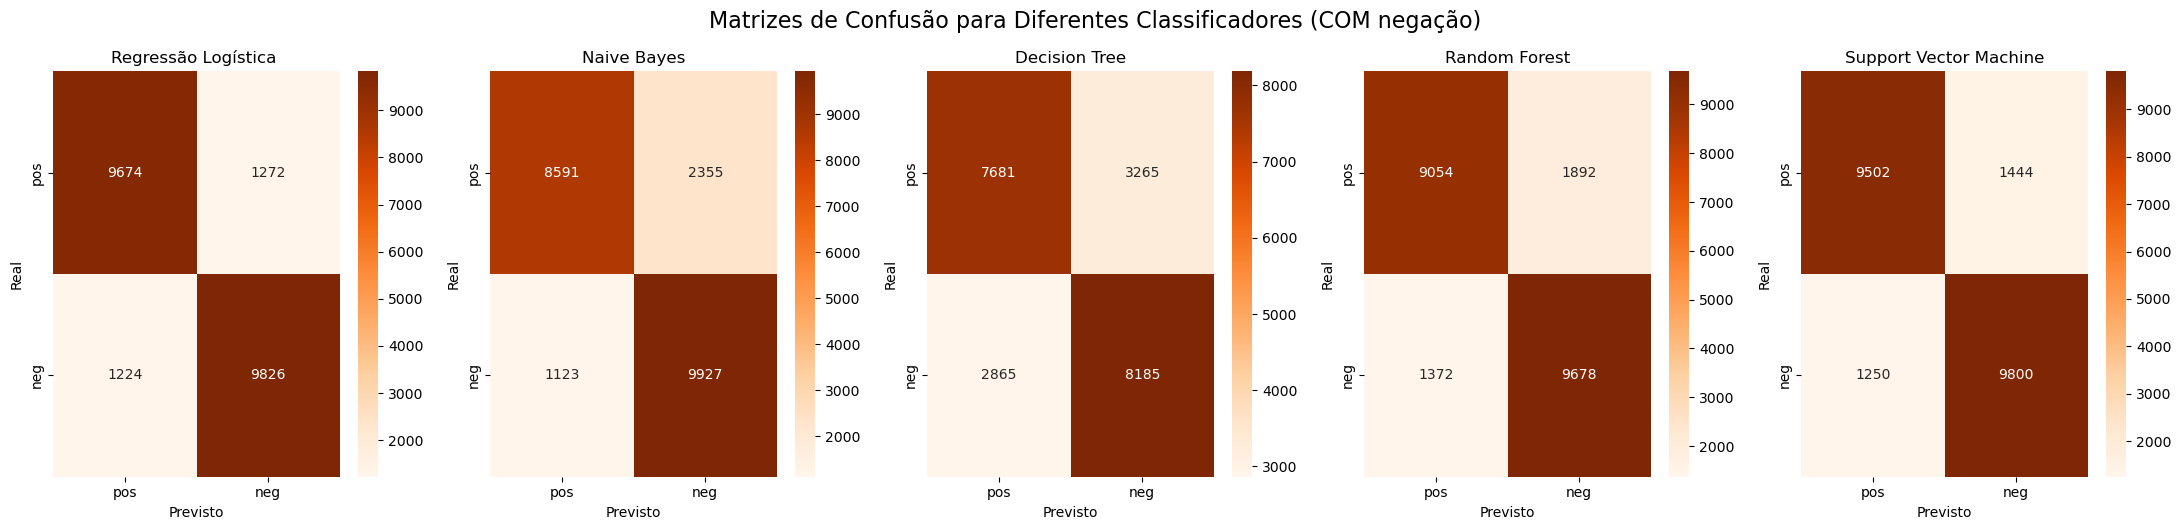

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(1, 5, figsize=(22, 5))

for i, (nome_modelo, y_pred_modelo) in enumerate(classificador.items()):
    cm = confusion_matrix(y_test, y_pred_modelo, labels=["pos", "neg"])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
                xticklabels=["pos", "neg"],
                yticklabels=["pos", "neg"],
                ax=axes[i])
    axes[i].set_title(nome_modelo)
    axes[i].set_xlabel("Previsto")
    axes[i].set_ylabel("Real")

plt.tight_layout()
plt.suptitle("Matrizes de Confusão para Diferentes Classificadores (COM negação)", y=1.05, fontsize=16)
plt.show()


#### Matrizes de Confusão por Classificador (SEM negação)

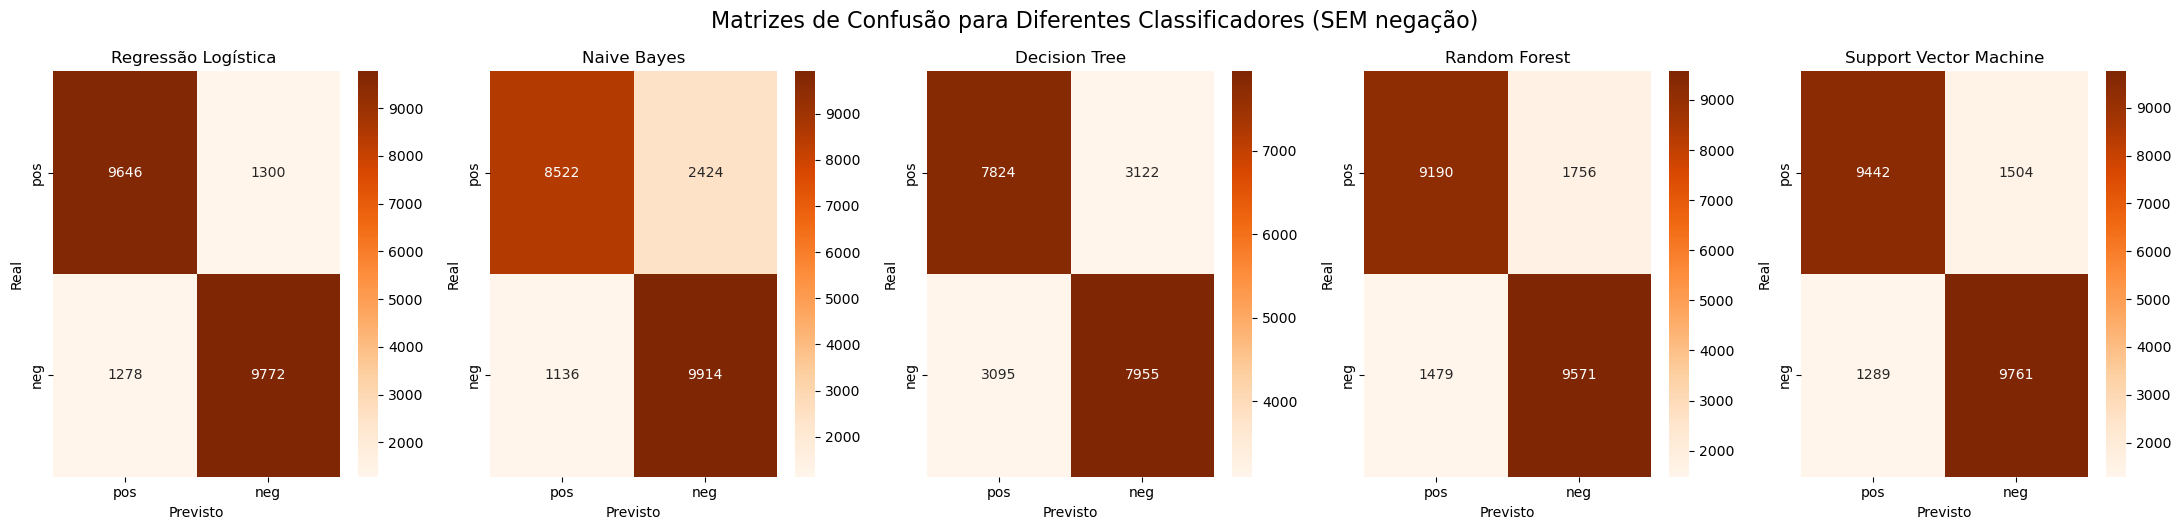

In [56]:
fig, axes = plt.subplots(1, 5, figsize=(22, 5))

for i, (nome_modelo_sn, y_pred_modelo_sn) in enumerate(classificador_sn.items()):
    cm_sn = confusion_matrix(y_test_sn, y_pred_modelo_sn, labels=["pos", "neg"])
    sns.heatmap(cm_sn, annot=True, fmt="d", cmap="Oranges",
                xticklabels=["pos", "neg"],
                yticklabels=["pos", "neg"],
                ax=axes[i])
    axes[i].set_title(nome_modelo_sn)
    axes[i].set_xlabel("Previsto")
    axes[i].set_ylabel("Real")

plt.tight_layout()
plt.suptitle("Matrizes de Confusão para Diferentes Classificadores (SEM negação)", y=1.05, fontsize=16)
plt.show()
